#### Preliminaries

First we import the libraries we will need, and the data.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp
import seaborn as sns
import math, dcor

%matplotlib inline

In [2]:
data = pd.read_csv('Table2_Hunt_2013_edit.csv')
data.describe()

,Gross pay,Phi-h,Position,Pressure,Random 1,Random 2,Gross pay transform,Production
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,9.823810,68.880952,1.885714,15.285714,10.190476,292.714286,16.579524,33.428571
std,5.948521,45.167894,0.708721,2.759400,6.439092,59.429069,6.543793,15.141909
min,0.100000,0.500000,1.000000,10.000000,1.000000,210.000000,3.540000,7.710000
25%,4.900000,24.600000,1.100000,14.000000,6.000000,245.000000,11.520000,22.670000
50%,10.000000,72.900000,2.000000,16.000000,10.000000,273.000000,16.900000,36.420000
75%,15.100000,100.000000,2.200000,17.000000,13.000000,340.000000,21.970000,44.200000
max,19.100000,160.000000,2.900000,20.000000,21.000000,395.000000,29.250000,59.200000


#### Function to annotate individual scatterplots with rank correlation coefficient, distance correlation, p-value

In [3]:
def corrfunc(x, y, **kws):
    r, p = sp.stats.spearmanr(x, y)
    d = dcor.distance_correlation(x,y)
    ax = plt.gca()
    ax.annotate("rnk = {:.2f}".format(r), xy=(.1, .97), xycoords=ax.transAxes, color = 'g', fontsize = 15)
    ax.annotate("dstnc = {:.2f}".format(d), xy=(.1, .87), xycoords=ax.transAxes, color = 'm', fontsize = 15)
    #ax.annotate("p = {:.2f}".format(p), xy=(.1, .78), xycoords=ax.transAxes, fontsize = 14)

# https://stackoverflow.com/a/30942817

In [4]:
import warnings
warnings.filterwarnings("ignore")

The code in the previous cell is to ignore future warning for a [known issue](https://github.com/h5py/h5py/issues/974)

#### Correlation matrix with bivariate scatter-plots in the upper triangle, contours in the lower triangle, shape of the bivariate distributions on the diagonal

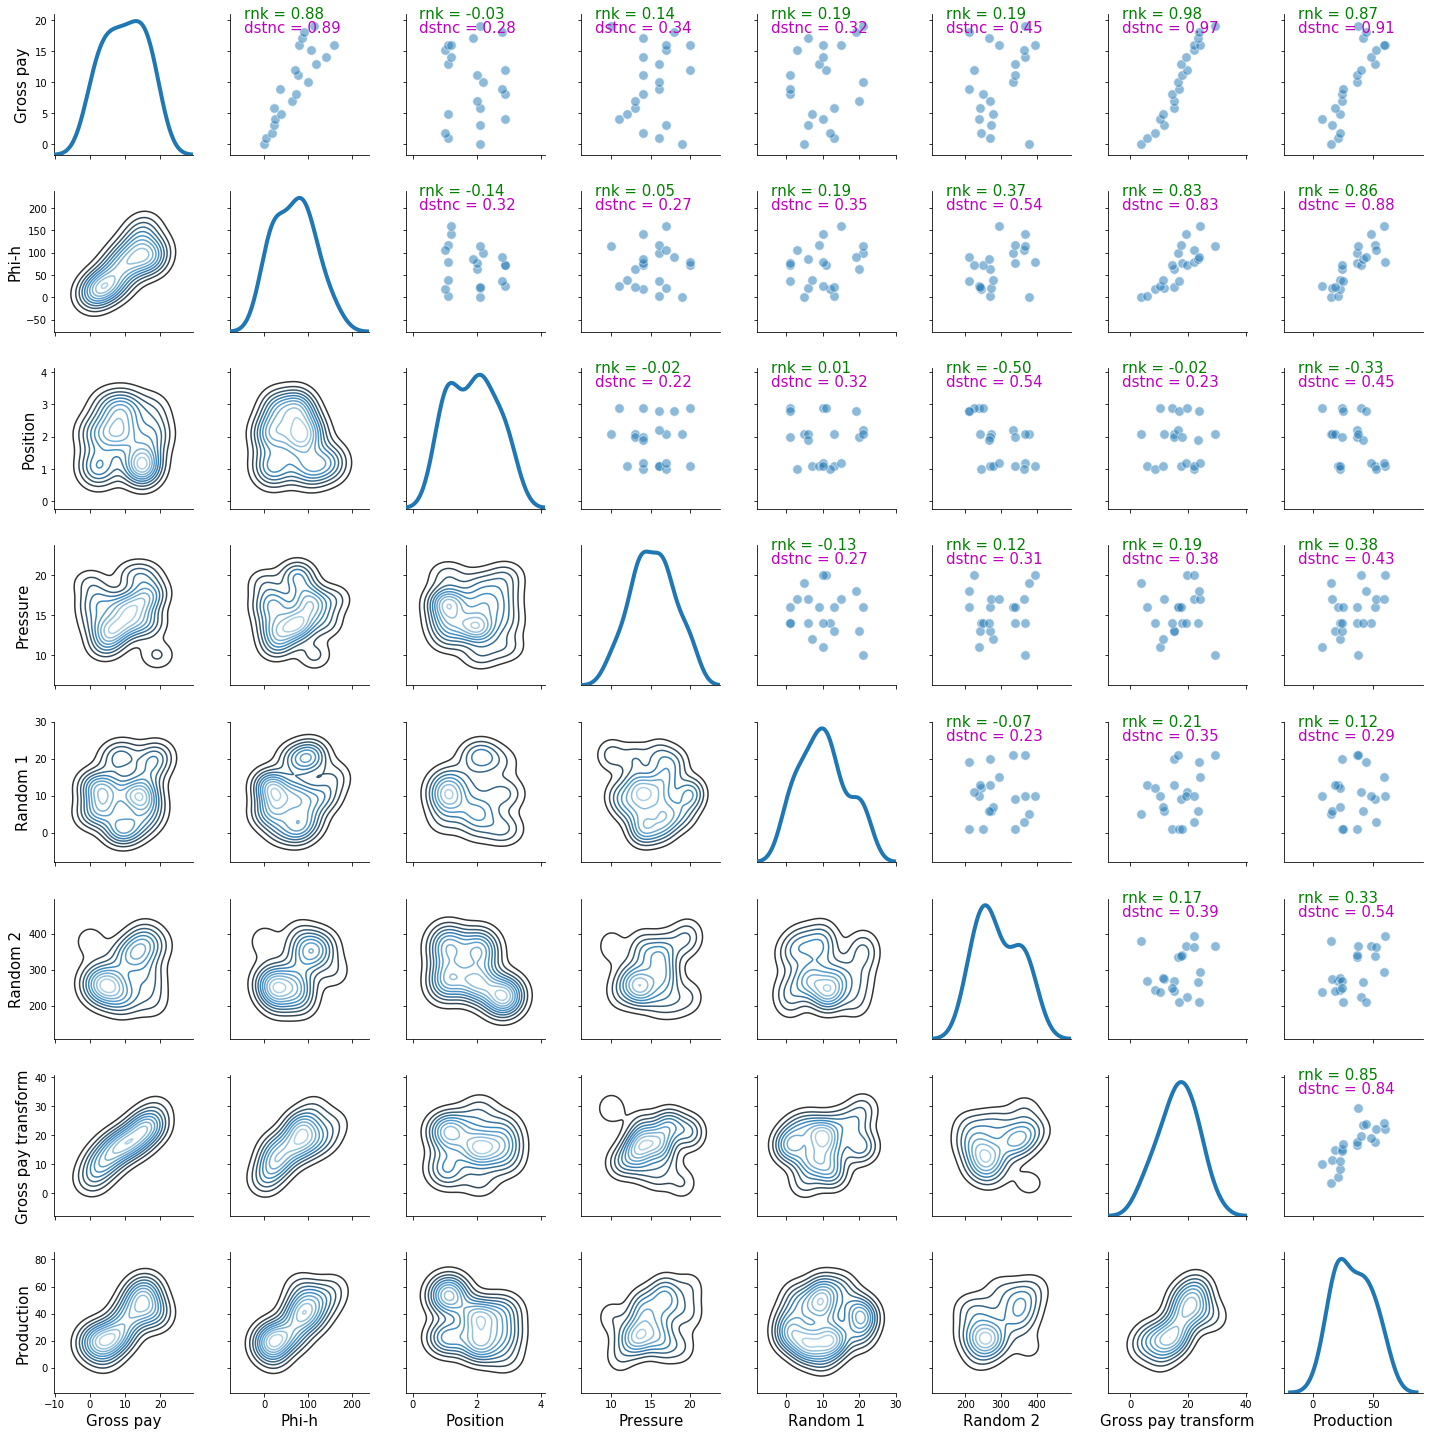

In [5]:
plt.rcParams["axes.labelsize"] = 15
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes

g.map_upper(plt.scatter,  linewidths=1, edgecolor="w", s=90, alpha = 0.5)
g.map_upper(corrfunc)

g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")

plt.savefig('matrix.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

#### Critical r test

A good way is to compare the correlation coefficient to a threshold value called critical r. From the definitions, critical r is the value of the correlation coefficient at which you can rule out chance as an explanation for the relationship in the sample.

To calculate the critical r, we first get the number of wells and degrees of freedom.

In [6]:
nwells, nfeatures = data.shape
print ('nunber of wells =', nwells)
print ('df =' ,nwells-2)

nunber of wells = 21
df = 19


Further, we need to calculate the critical t (or inverse t) for the specific significance level (95%) and degrees of freedom we are considering. This can be found in Student's t distribution tables, but fortunately we can also calculate it using the statistical library from Scipy.

With alpha = 0.05 and df = (21 - 2) = 19, we get:

In [7]:
t = sp.stats.t.isf(0.025, nwells-2) # required input is alpha/2

which corresponds to the value we would get from <a href="http://growingknowing.com/GKStatsBookStudentTTable.html"> the Student's t distribution tables</a> at row 19 (df = 19), column 3 (2-tail alpha = 0.05).

With this value of t we calculate the critical r as (<a href="http://brownmath.com/stat/correl.htm#DecisionPoints">formula from Brown</a>):

\begin{equation*}
r = \frac{t}{\sqrt{df+t^2}} 
\end{equation*}

In [8]:
r_crit = t/np.sqrt((nwells-2)+ np.power(t,2))
print (r_crit)

0.4328575563165211


What is this number telling us?

It tells us that with 21 wells (19 degrees of freedom) and 5% as the maximum chance of being wrong we are willing to take (confidence level 95%),  we need a value of correlation coefficient of at least 0.43 to rule out chance as an explanation for a specific correlation.

#### First observations:
- linear relationships:
- correlation coefficient vs. critical r:
- p-value
- Position (ranked position within the reservoir) seems to be a very important variable nothwidstanding the significance tests. Indeed, Gross-pay, Phi-h, Pressure, and Production all cluster according to position.
